<a href="https://colab.research.google.com/github/TanviKhare/LGMVIP--DataScience/blob/main/TaskI1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

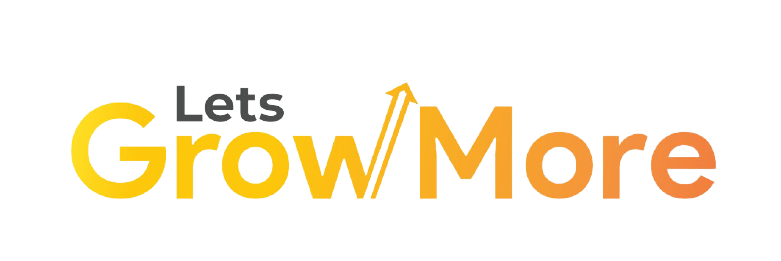

Name : Tanvi Khare

Domain: Data Science

Task Level: Intermediate

Task Number : 1

1) Exploratory Data Analysis on Dataset - Terrorism 

As a security/defense analyst, try to find out the hot zone of terrorism.

Dataset: https://bit.ly/2TK5Xn5




In [11]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('/content/drive/MyDrive/LGM-VIP/terrorism.csv',encoding="latin1")
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [13]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [14]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attack','targtype1_txt':'Target','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)
data.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [15]:
data = data[['Year','Month','Day','Country','State','Region','City','latitude','longitude',"Attack",'kill',
               'Wound','target1','summary','Group','Target','Weapon','motive']]
data.head()

,Year,Month,Day,Country,State,Region,City,latitude,longitude,Attack,kill,Wound,target1,summary,Group,Target,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [16]:
data.isna().sum().sort_values()

Year              0
Month             0
Day               0
Country           0
Region            0
Weapon            0
Attack            0
Target            0
Group             0
State           421
City            434
target1         636
latitude       4556
longitude      4557
kill          10313
Wound         16311
summary       66129
motive       131130
dtype: int64

In [18]:
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)
data['Casualties'] = data['kill'] + data['Wound']
data.drop(['motive','summary','latitude','longitude'],axis=1,inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   Attack      181691 non-null  object 
 8   kill        181691 non-null  float64
 9   Wound       181691 non-null  float64
 10  target1     181055 non-null  object 
 11  Group       181691 non-null  object 
 12  Target      181691 non-null  object 
 13  Weapon      181691 non-null  object 
 14  Casualties  181691 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 20.8+ MB


In [20]:
data.describe()

,Year,Month,Day,kill,Wound,Casualties
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,9574.000000


In [21]:
data.corr()

,Year,Month,Day,kill,Wound,Casualties
Year,1.000000,0.000139,0.018254,0.021252,0.017484,0.020675
Month,0.000139,1.000000,0.005497,0.004031,0.003178,0.003805
Day,0.018254,0.005497,1.000000,-0.003225,-0.001082,-0.001808
kill,0.021252,0.004031,-0.003225,1.000000,0.443326,0.651885
Wound,0.017484,0.003178,-0.001082,0.443326,1.000000,0.968724
Casualties,0.020675,0.003805,-0.001808,0.651885,0.968724,1.000000


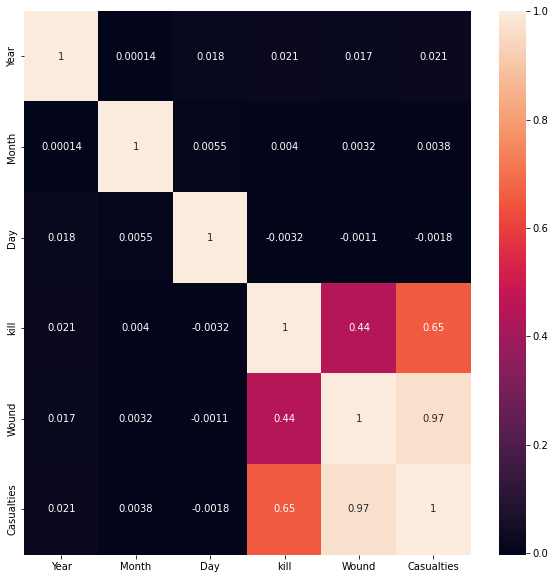

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True); 

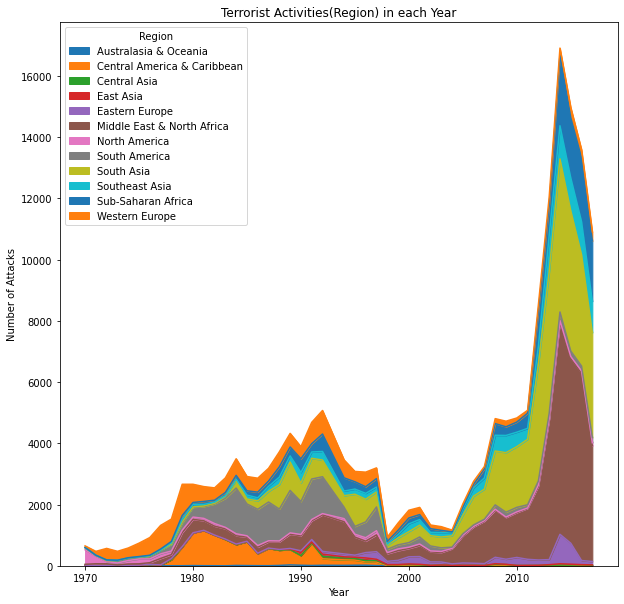

In [23]:
pd.crosstab(data['Year'], data['Region']).plot(kind='area',figsize=(10,10))
plt.title('Terrorist Activities(Region) in each Year')
plt.ylabel('Number of Attacks')
plt.show()

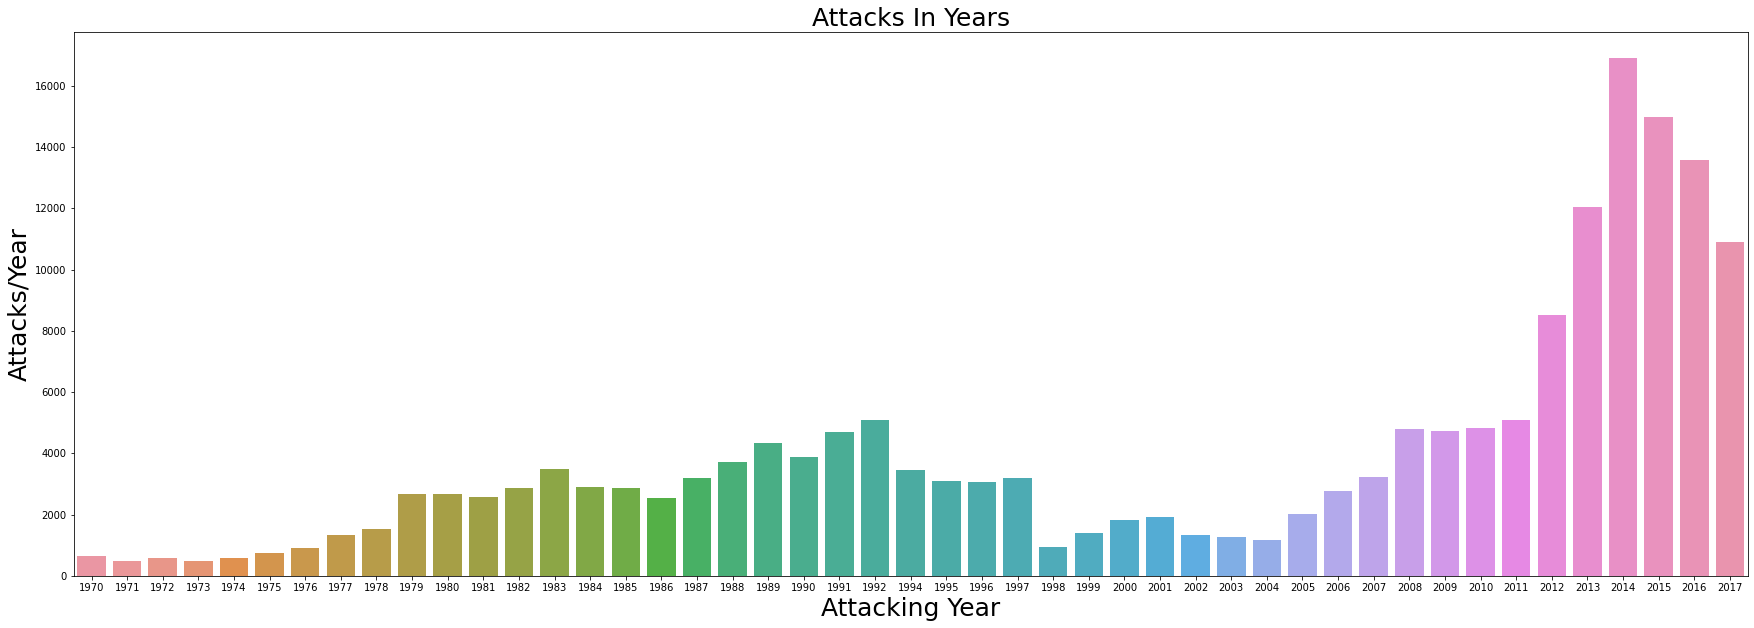

In [24]:
year=data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (30,10))
sns.barplot(x = year,y = years_count)
plt.xlabel('Attacking Year',fontsize=25)
plt.ylabel('Attacks/Year',fontsize=25)
plt.title('Attacks In Years',fontsize=25)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


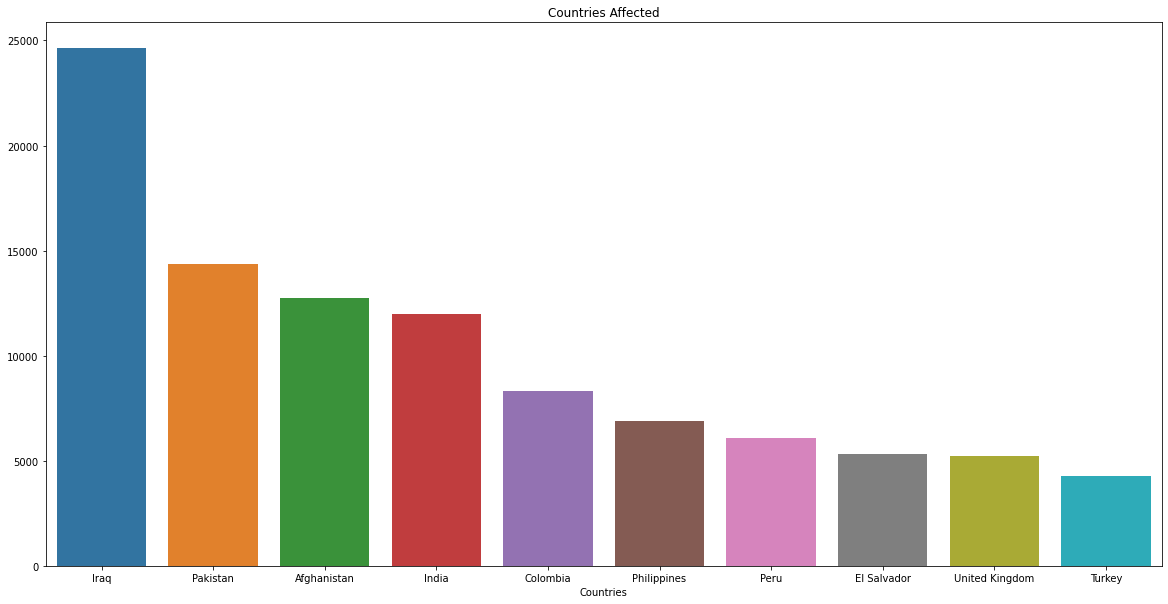

In [25]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values)
plt.title('Countries Affected')
plt.xlabel('Countries')
#plt.xticks(rotation = 50)
plt.show()

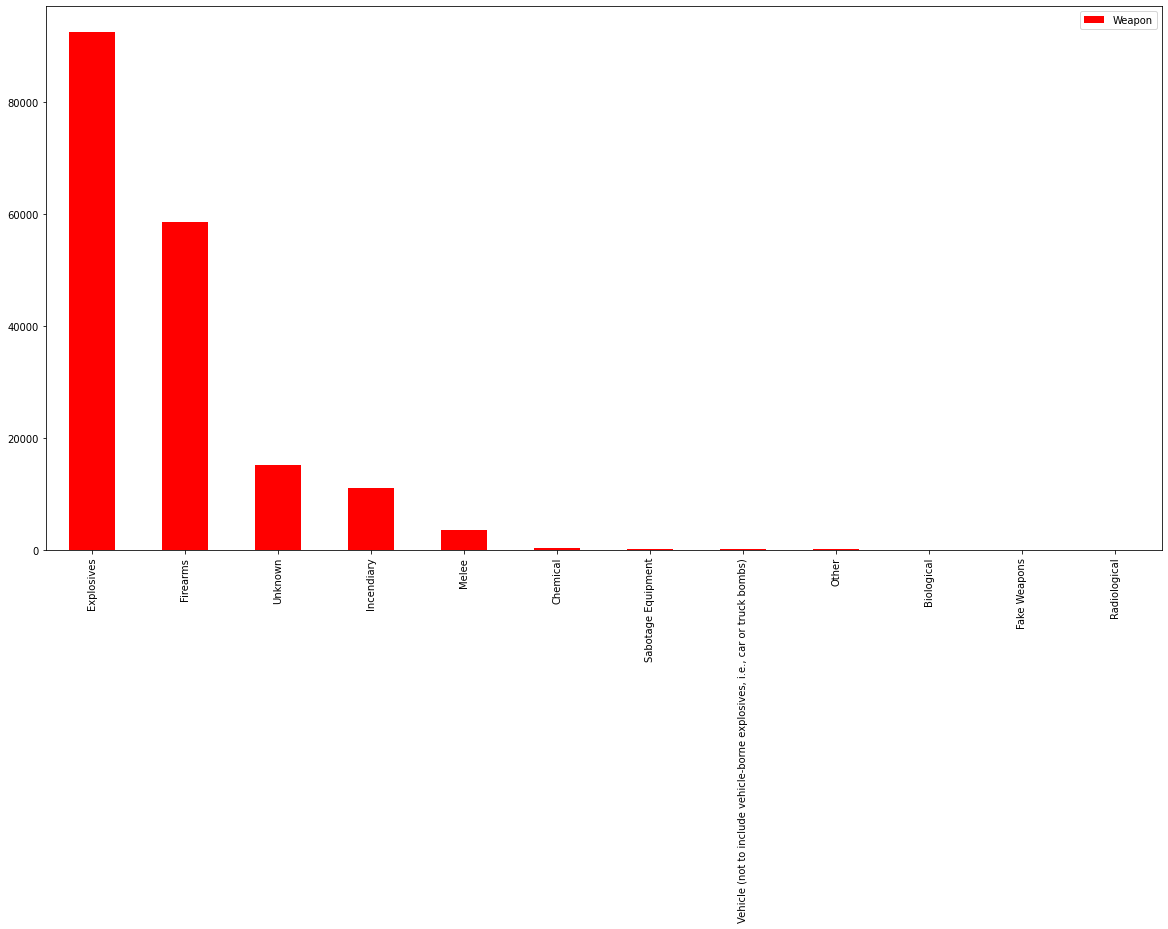

In [26]:
data['Weapon'].value_counts().to_frame().sort_values('Weapon',axis=0,ascending=False).plot(kind='bar',figsize=(20,10),color="red")

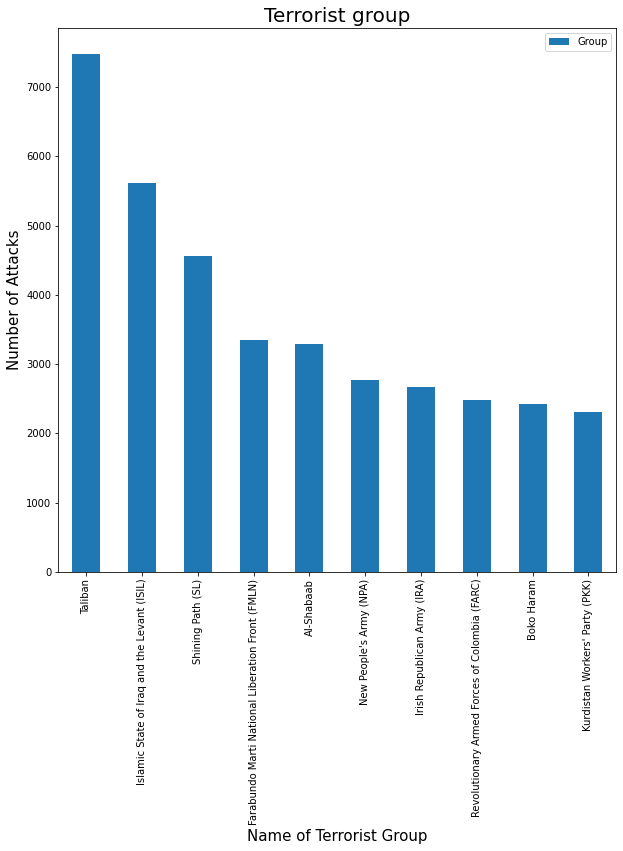

In [27]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',figsize = (10,10))
plt.title("Terrorist group",fontsize=20)
plt.xlabel("Name of Terrorist Group",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [28]:
iraq = data[data['Country']=='Iraq']
iraq.head()

,Year,Month,Day,Country,State,Region,City,Attack,kill,Wound,target1,Group,Target,Weapon,Casualties
2854,1975,3,1,Iraq,Nineveh,Middle East & North Africa,Mosul,Hijacking,0.0,1.0,B-737,Unknown,Airports & Aircraft,Unknown,1.0
4385,1976,12,15,Iraq,Baghdad,Middle East & North Africa,Baghdad,Bombing/Explosion,10.0,285.0,Airport terminal,Unknown,Airports & Aircraft,Explosives,295.0
4393,1976,12,18,Iraq,Unknown,Middle East & North Africa,Penjwon,Hostage Taking (Kidnapping),0.0,0.0,agricultural experts in NE Iraq,Kurdish Democratic Party-Iraq (KDP),Government (General),Unknown,0.0
4402,1976,12,24,Iraq,Baghdad,Middle East & North Africa,Baghdad,Assassination,2.0,0.0,Personnel,Unknown,Violent Political Party,Firearms,2.0
8688,1979,6,15,Iraq,Basra,Middle East & North Africa,Basra,Assassination,1.0,0.0,local secretary,Unknown,Government (General),Unknown,1.0


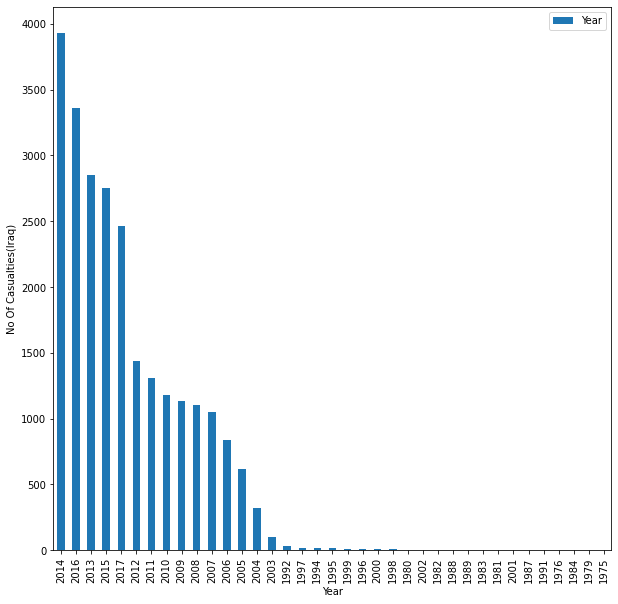

In [29]:
iraq['Year'].value_counts().to_frame().plot(kind='bar',figsize = (10,10))
plt.ylabel("No Of Casualties(Iraq)")
plt.xlabel("Year")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


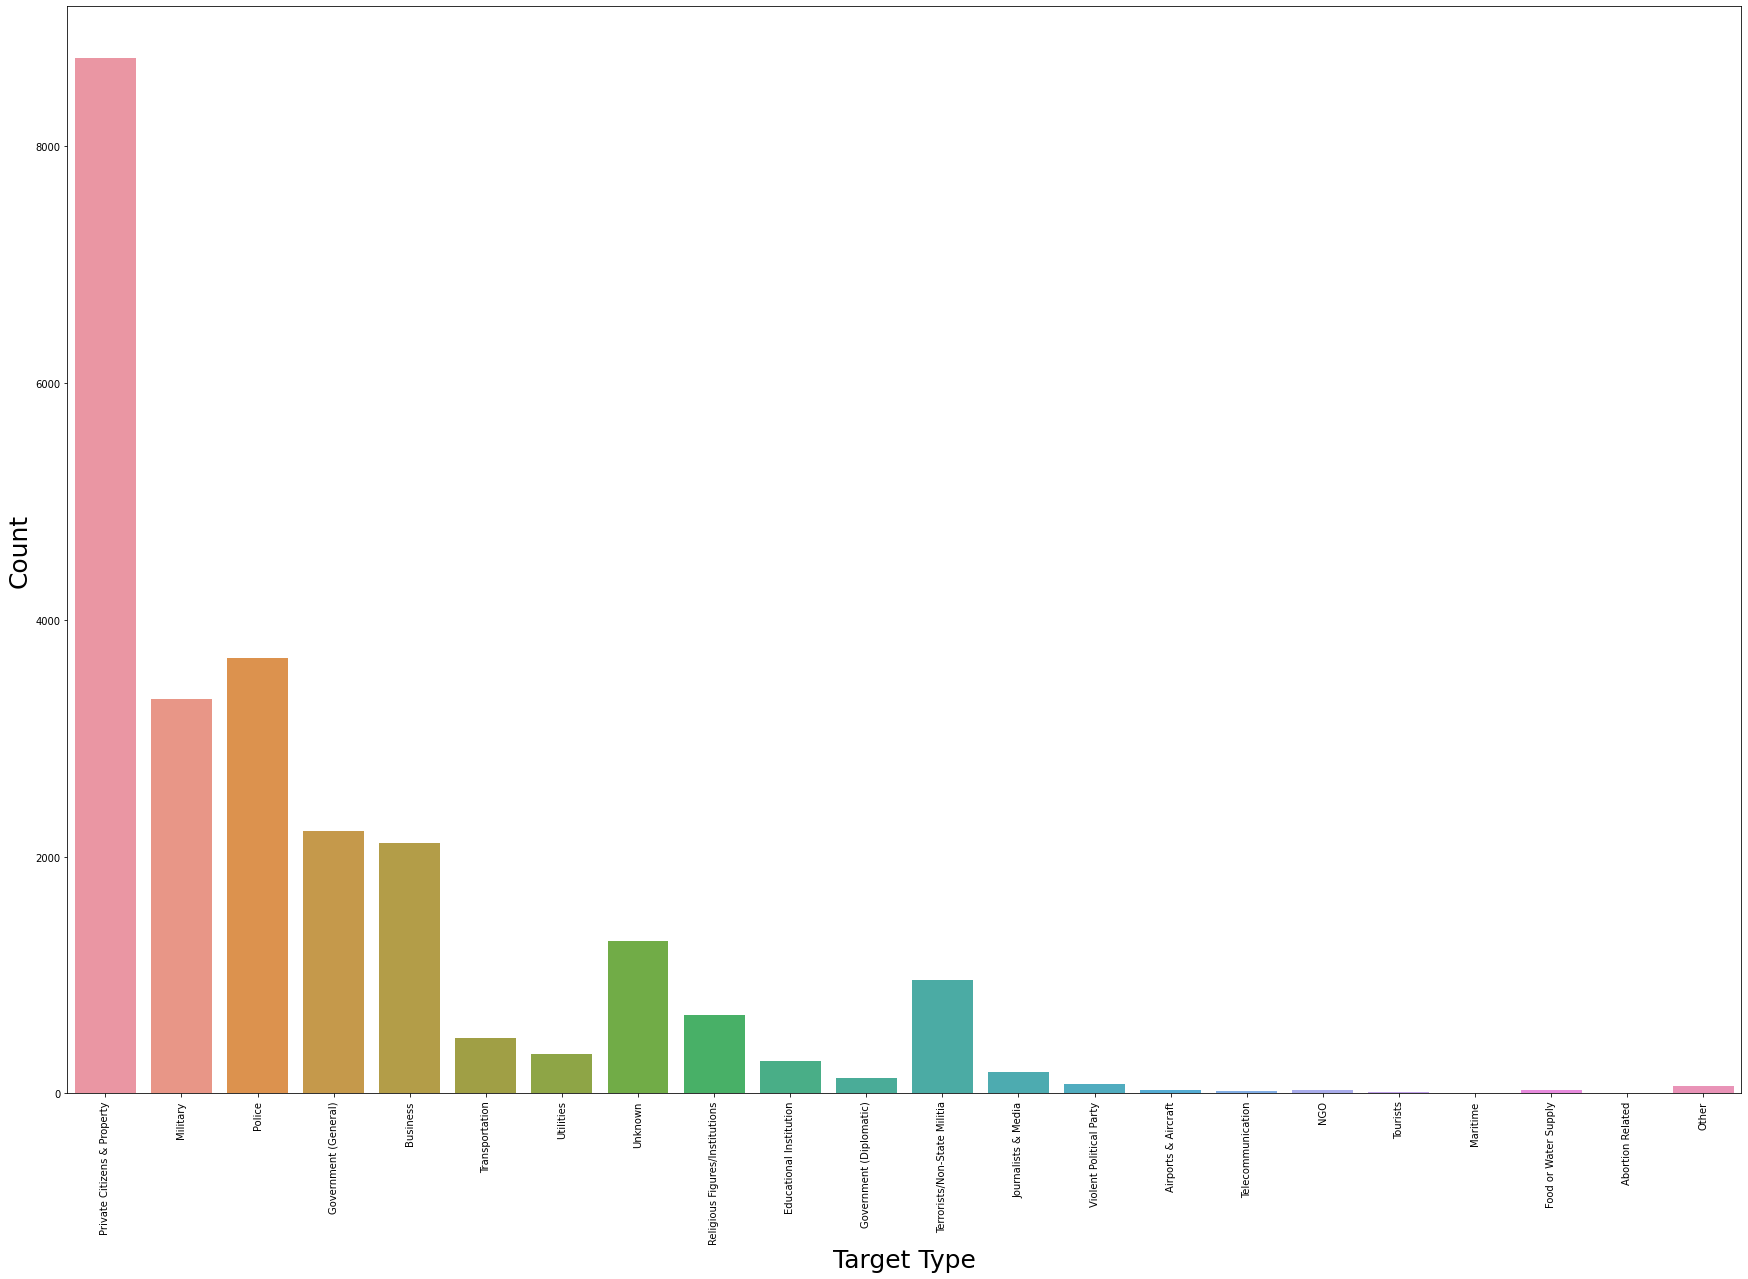

In [30]:
plt.subplots(figsize=(30,20))
sns.countplot(iraq["Target"],order=data['Target'].value_counts().index);
plt.xticks(rotation=90)
plt.xlabel("Target Type",fontsize=25)
plt.ylabel("Count",fontsize=25)
plt.show()

In [31]:
city= data['City'].value_counts().drop('Unknown').reset_index()
city

,index,City
0,Baghdad,7589
1,Karachi,2652
2,Lima,2359
3,Mosul,2265
4,Belfast,2171
...,...,...
36668,Hotwag,1
36669,Ostend,1
36670,Balughata,1
36671,Jikoyi,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


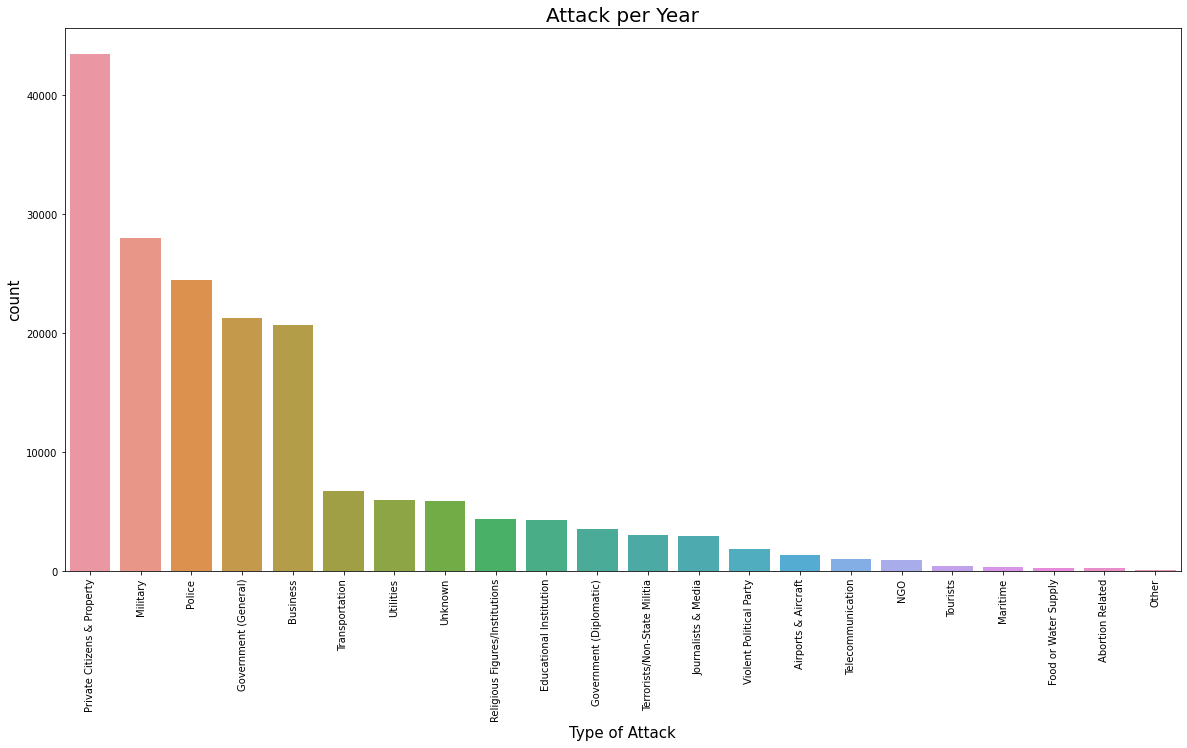

In [32]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Target"],order=data['Target'].value_counts().index);
plt.xticks(rotation=90)
plt.xlabel("Type of Attack",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per Year",fontsize=20)
plt.show()


In [33]:
city_iraq = iraq['City'].value_counts().reset_index()
city_iraq

,index,City
0,Baghdad,7585
1,Mosul,2265
2,Kirkuk,925
3,Baqubah,745
4,Fallujah,579
...,...,...
1508,Albu Awad,1
1509,Al-Islah Al-Zirai,1
1510,Tall Maftul,1
1511,Mohammadi,1


#Inferences:

1. Highly affected Regions ofthe word: 
  
  -> Middle East and North Africa
  
  -> South Asia

  -> South America


2. Year of the most attacks : 2014


3. Countries(hot spot) for attacks : 

  -> Iraq

  -> Pakistan

  -> Afghanistan


4. Weapons (most commonly used)

  -> Explosives

  -> Firearms

  -> Incendiary



5. Terror Groups

  -> Taliban

  -> ISIL

  -> SL


6. Target of Attacks

  -> Private Citizens & property

  -> Police

  -> Military

  

7. Cities with most attacks 

  -> Baghdad (Iraq)

  -> Karachi (Pakistan)

  -> Lima (Peru)



8. Year of the most attacks (Iraq) : 2014

.

( A few prominent attacks : 

October 9: A suicide attack killed 10 people in Baquba.

 October 12: A series of terrorist bombings in Baghdad including a suicide attack killed more than 50 people. A wave of bombings in Baquba killed 31 people and wounded 70 others. 
 
 October 14: A suicide attack in Baghdad killed 19 people and wounded 35 others.)


.

 9. Cities with Most attacks (In Iraq)

  -> Baghdad

  -> Mosul

  -> Kirkuk



